# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

CRIM: This is the per capita crime rate by town

ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.

INDUS: This is the proportion of non-retail business acres per town.

CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)

NOX: This is the nitric oxides concentration (parts per 10 million)

RM: This is the average number of rooms per dwelling

AGE: This is the proportion of owner-occupied units built prior to 1940

DIS: This is the weighted distances to five Boston employment centers

RAD: This is the index of accessibility to radial highways

TAX: This is the full-value property-tax rate per $10,000

PTRATIO: This is the pupil-teacher ratio by town

B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town

LSTAT: This is the percentage lower status of the population

MEDV: This is the median value of owner-occupied homes in $1000s

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [14]:
import numpy as np
import pandas as pd


data=pd.read_csv('/Users/abc/All Labs/module-3/9. Problems-in-ML/data/boston_data.csv')

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

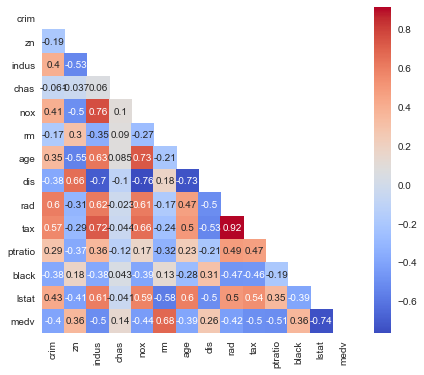

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


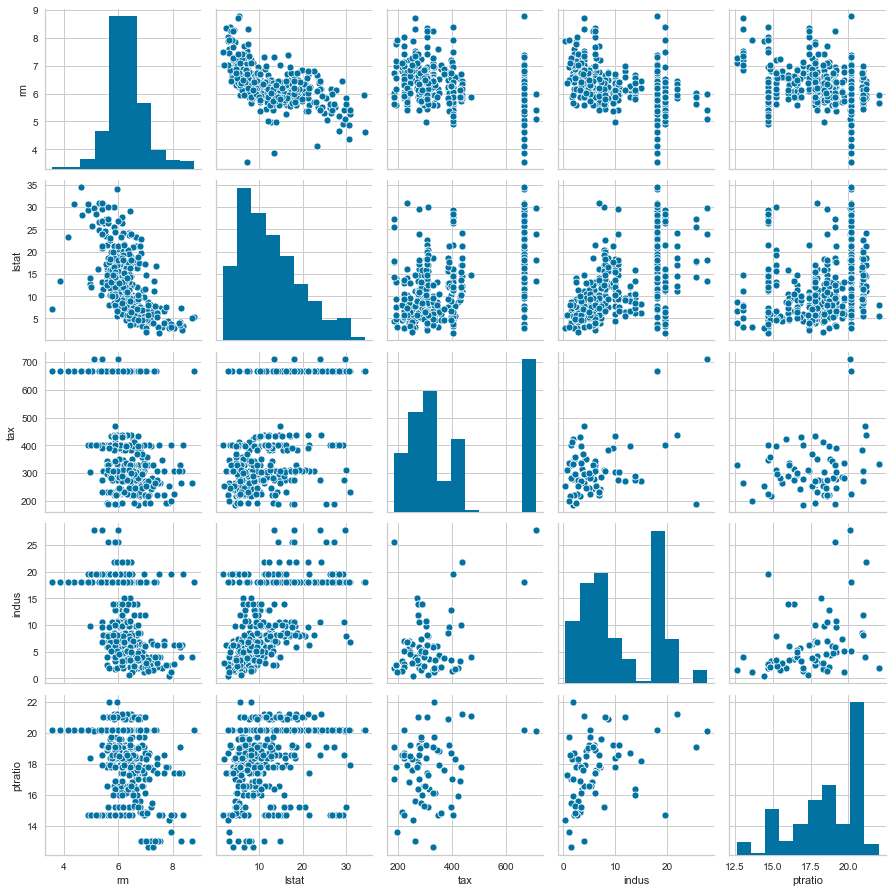

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_matrix = data.corr()
plt.figure(figsize=(7, 6))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap= 'coolwarm',
            mask=mask)
plt.show()



sns.pairplot(data[['rm','lstat','tax','indus','ptratio']], size=2.5)
plt.tight_layout()


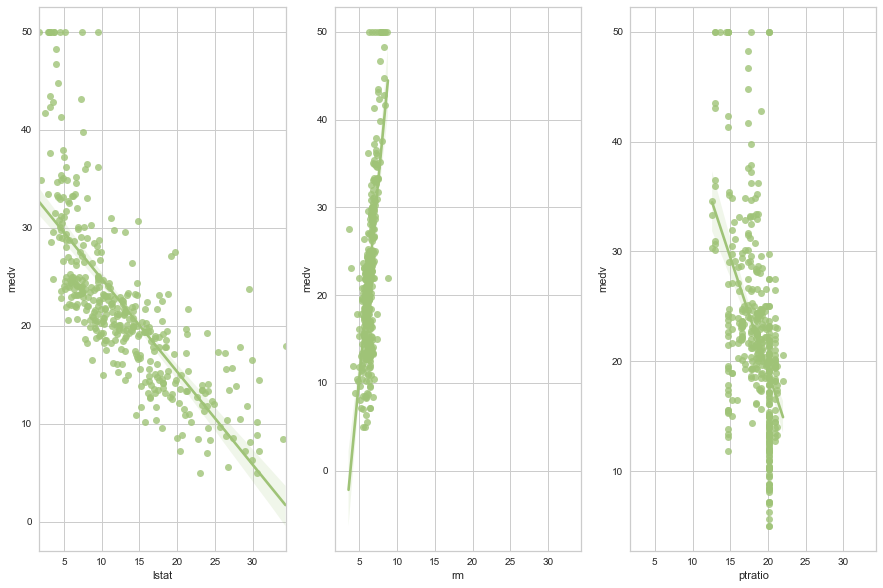

In [104]:

f, axes = plt.subplots(1, 3, figsize=(15, 10), sharex=True)
sns.regplot(x=data['lstat'], y=data['medv'], color="g",ax=axes[0])
sns.regplot(x=data['rm'], y=data['medv'], color="g",ax=axes[1])
sns.regplot(x=data['ptratio'], y=data['medv'], color="g",ax=axes[2])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [16]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [12]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [23]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,404.0,3.730912,8.943922,0.00632,0.082382,0.253715,4.053158,88.9762
zn,404.0,10.509901,22.053733,0.00000,0.000000,0.000000,12.500000,95.0000
indus,404.0,11.189901,6.814909,0.46000,5.190000,9.795000,18.100000,27.7400
chas,404.0,0.069307,0.254290,0.00000,0.000000,0.000000,0.000000,1.0000
nox,404.0,0.556710,0.117321,0.39200,0.453000,0.538000,0.631000,0.8710
rm,404.0,6.301450,0.675830,3.56100,5.902750,6.230500,6.629250,8.7800
age,404.0,68.601733,28.066143,2.90000,45.800000,76.600000,94.150000,100.0000
dis,404.0,3.799666,2.109916,1.16910,2.087875,3.207450,5.222125,12.1265
rad,404.0,9.836634,8.834741,1.00000,4.000000,5.000000,24.000000,24.0000
tax,404.0,411.688119,171.073553,187.00000,281.000000,330.000000,666.000000,711.0000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [24]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    
    score = r2_score(y_true, y_predict)
    
    return score


    

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [105]:
from sklearn.model_selection import train_test_split


X=data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]  
y=data['medv']
test_size=0.2

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, shuffle=True)




----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

Random Forests models require minimal data preparation. It is able to easily hand categorical, numerical and binary features without scaling or normalization required.
Random Forests models can help us in performing implicit feature selections as they provide good indicators of the important features.
Random Forest models are immune to outliers, 

which is present in our data, and they completely ignore statistical issues because unlike other machine learning models which perform much better after being normalized.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [116]:
# Five separate RFR here with the given max depths


from sklearn.ensemble import RandomForestRegressor

train=[]
test=[]
for i in range(1,30,2):   # 1,3,5,7,9,11,...,29
    regr = RandomForestRegressor(max_depth=i)    # 
    regr.fit(X_train, y_train)
    train.append(regr.score(X_train,y_train))
    test.append(regr.score(X_test,y_test))


Now, plot the score for each tree on the training set and on the testing set.

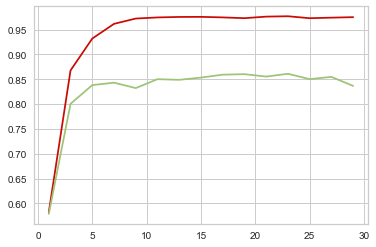

In [118]:
# Produce a plot with the score for the testing and training for the different max depths


plt.plot(range(1,30,2),train, color='r')  #train is a list produced by RandomForestRegressor model, with the (max_depth=i) increase
plt.plot(range(1,30,2),test,color='g')





What do these results tell you about the effect of the depth of the trees on the performance of the model?


### As the depth increases, the score of the model increases.  However, when the model is trained with the maximum depth of 6 or higher, the score stabilizes.





### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

### When the model is trained with a maximum depth of 1, the model suffers from high bias.When the model is trained with a maximum depth of 10, the model suffers with low bias and high variance.


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

 Not sure max_depth parameter=1 is the best 



for example, would limit trees to at most 50 splits down any given branch. This has the consequence that our Random Forest can no more fit the training data as closely, and is consequently more stable. It has lower variance, giving our model lower error.



In [122]:
regr = RandomForestRegressor(max_depth=6)
regr.fit(X_train, y_train)

regr.score(X_test,y_test)






0.8217738099393215

In [123]:
from sklearn.metrics import mean_absolute_error
y_pred=regr.predict(X_test)
mean_absolute_error(y_test, y_pred)

2.417912986803097

In [124]:

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

12.225782584375539

### The max__depth would be 6. The model presents an 82% score.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here